# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

# First, retrieve the web page's HTML content currently loaded in the browswer
html = browser.html

# Then, parse the HTML content with BeautifulSoup (aliased as 'soup')
parsed_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table_Data = parsed_soup.find_all('tr', class_='data-row')
table_Data

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Hereâ€™s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
marsDataList = []

# Loop through the scraped data to create a list of rows
for row in table_Data:
    
    # Extract data from each cell in the row
    data = row.find_all('td')
    
    # Create a dictionary for each row
    row_data = {
        'id': data[0].text,
        'terrestrial_date': data[1].text,
        'sol': data[2].text,
        'ls': data[3].text,
        'month': data[4].text,
        'min_temp': data[5].text,
        'pressure': data[6].text
    }
    
    #print(row_data)
    
    # Add the dictionary to the list
    marsDataList.append(row_data)
    
#marsDataList

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
marsDataDF = pd.DataFrame(marsDataList)

In [8]:
# Confirm DataFrame was created successfully
marsDataDF.head()

id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
marsDataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis

# First, convert the datatypes, except for terrestrial_date since will need to use .to_datetime function 
convert_DatatypeDict = {'id': int,
                       'sol': int,
                       'ls': int,
                       'month': int,
                       'min_temp': float,
                       'pressure': float
                       }

# Use .astype to convert existing datatypes into those in convert_DatatypeDict
marsDataDF = marsDataDF.astype(convert_DatatypeDict)

# Use .to_datetime to convert terrestrial_date to datetime 
marsDataDF['terrestrial_date'] = pd.to_datetime(marsDataDF['terrestrial_date'])

In [11]:
# Confirm type changes were successful by examining data types again
marsDataDF.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
marsMonths = marsDataDF['month'].nunique()
print(marsMonths)

12


In [13]:
# 2. How many Martian days' worth of data are there?
martianDays = marsDataDF['sol'].nunique()
print(martianDays)

1867


In [14]:
# 3. What is the average low temperature by month?

# Calculate the monthly average low temperature
monthlyAvgLowTemp = marsDataDF.groupby('month')['min_temp'].mean(numeric_only=True)
#monthlyAvgLowTemp

# Convert the Pandas Series to a Pandas DataFrame
monthlyAvgLowTempDF = monthlyAvgLowTemp.reset_index()

# Rename the columns for clarity
monthlyAvgLowTempDF.columns = ['month', 'avg_min_temp']

# Display the monthlyAvgLowTempDF
monthlyAvgLowTempDF

month  avg_min_temp
0       1    -77.160920
1       2    -79.932584
2       3    -83.307292
3       4    -82.747423
4       5    -79.308725
5       6    -75.299320
6       7    -72.281690
7       8    -68.382979
8       9    -69.171642
9      10    -71.982143
10     11    -71.985507
11     12    -74.451807

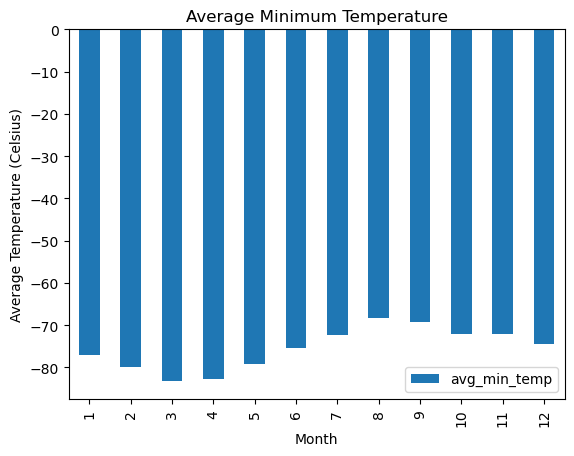

In [15]:
# Plot the average minimum temperature by month
monthlyAvgLowTempDF.plot(x = 'month', y = 'avg_min_temp', kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.title('Average Minimum Temperature');

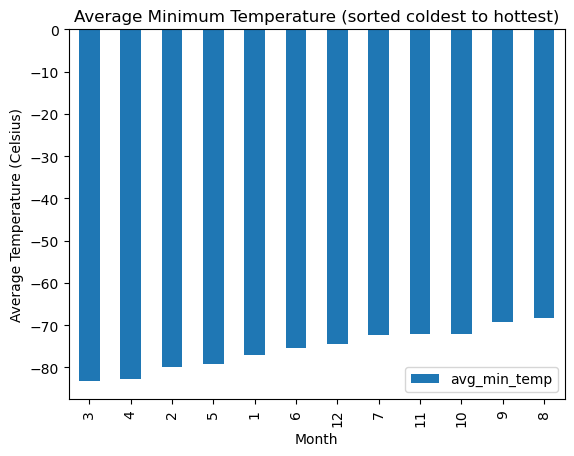

In [16]:
# Identify the coldest and hottest months in Curiosity's location

# First, sort the monthlyAvgLowTempDF's avg_min_temp column in asceding order (i.e, coldest to hottest)
sorted_monthlyAvgLowTempDF = monthlyAvgLowTempDF.sort_values(by='avg_min_temp')

# Then, plot the bar chart
sorted_monthlyAvgLowTempDF.plot(x = 'month', y = 'avg_min_temp', kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.title('Average Minimum Temperature (sorted coldest to hottest)');

In [17]:
# 4. Average pressure by Martian month

# Calculate the monthly average pressure
monthlyAvgPressure = marsDataDF.groupby('month')['pressure'].mean(numeric_only=True)
monthlyAvgPressure

# Convert the Pandas Series to a Pandas DataFrame
monthlyAvgPressureDF = monthlyAvgPressure.reset_index()

# Rename the columns for clarity
monthlyAvgPressureDF.columns = ['month', 'avg_pressure']

# Display the monthlyAvgPressureDF
monthlyAvgPressureDF

month  avg_pressure
0       1    862.488506
1       2    889.455056
2       3    877.322917
3       4    806.329897
4       5    748.557047
5       6    745.054422
6       7    795.105634
7       8    873.829787
8       9    913.305970
9      10    887.312500
10     11    857.014493
11     12    842.156627

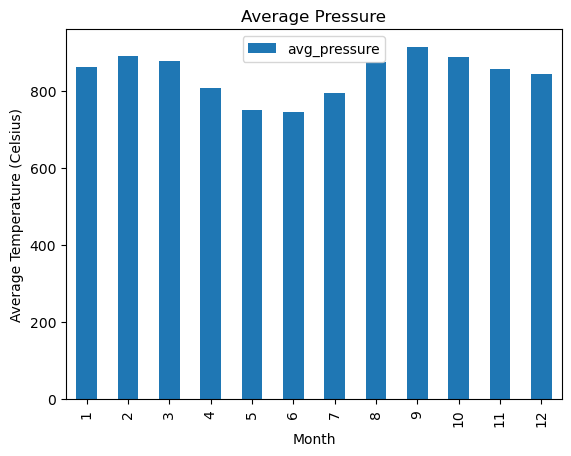

In [18]:
# Plot the average pressure by month
monthlyAvgPressureDF.plot(x = 'month', y = 'avg_pressure', kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.title('Average Pressure');

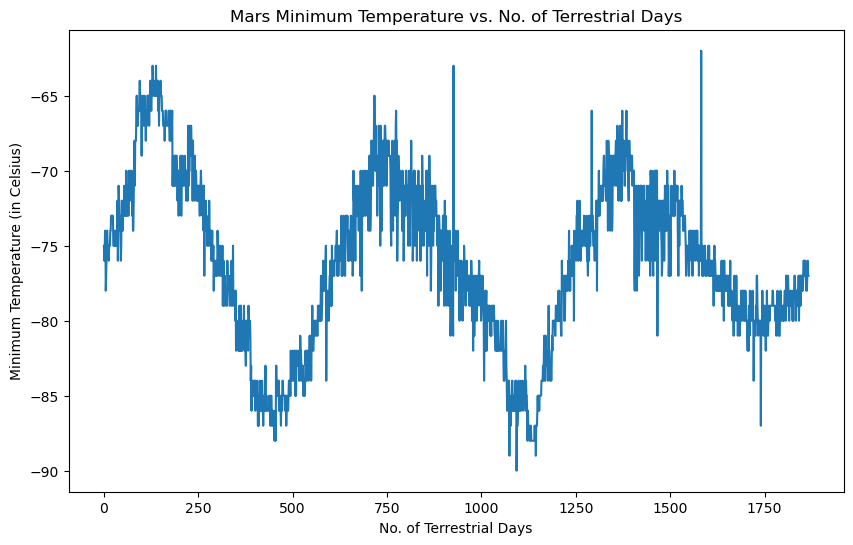

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# First, plot the Mars data set, which will illustrate martian annual cycle of temperature changes
plt.figure(figsize = (10,6))
marsDataDF['min_temp'].plot()
plt.xlabel('No. of Terrestrial Days')
plt.ylabel('Minimum Temperature (in Celsius)')
plt.title('Mars Minimum Temperature vs. No. of Terrestrial Days')
plt.show()

**Response #3**: Based on the 'Average Minimum Temperature (sorted coldest to hottest)' bar chart above, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest.


**Response #4**: Based on the 'Average Pressure' bar chart above, atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth month.

**Response #5**: Based on the 'Mars Minimum Temperature vs. No. of Terrestrial Days' line plot above, the distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
marsDataDF.to_csv('Mars data.csv')

In [21]:
browser.quit()